In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
X = pd.DataFrame(data['alcohol'])
X['x_0'] = 1
y = data['quality']

In [5]:
X = np.matrix(X.values)
y = np.matrix(y.values).T

In [6]:
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

In [7]:
theta

matrix([[0., 0.]])

In [8]:
X.shape

(1599, 2)

In [10]:
def ols_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [11]:
ols_cost(X, y, theta)

16.20825515947467

In [12]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters + 1)
    cost[0] = ols_cost(X, y, theta)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = ols_cost(X, y, theta)
        
    return theta, cost

In [14]:
alpha = 0.01
iters = 1000
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)
ols_cost(X, y, theta_final)

0.2660076719790539

In [15]:
x = np.linspace(data.alcohol.min(), data.alcohol.max(), 100)
y_hat = theta_final[0,1] + theta_final[0,0] * x

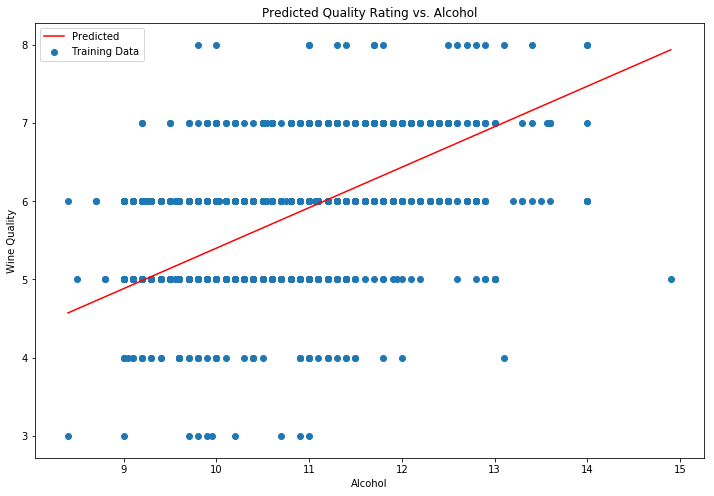

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y_hat, 'r', label='Predicted')
ax.scatter(data.alcohol, data.quality, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Alcohol')
ax.set_ylabel('Wine Quality')
ax.set_title('Predicted Quality Rating vs. Alcohol')
plt.show()
